<a href="https://colab.research.google.com/github/vivian-assis/projetoClinicasNara/blob/main/ProjetoClinicasNara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [6]:
#Tarefas com Python
# Tratar os dados e calcular o tempo de espera
# Identificar outliers usando quartis (Q1, Q2, Q3)
# Comparar média e mediana por especialidade, médico e clínica
# Explorar correlações entre tempo de espera e nota de satisfação

In [7]:
#ler csvs
df_consultas = pd.read_csv('consultas_final.csv', sep = ',')
df_avaliacoes = pd.read_csv('avaliacoes_final.csv', sep=',')
df_pacientes = pd.read_csv('pacientes_final.csv', sep=',')
df_medicos = pd.read_csv('medicos_final.csv', sep = ';')
df_clinicas = pd.read_csv('clinicas_final.csv', sep = ',')


CONSULTAS - TEMPO DE ESPERA

In [8]:
df_consultas

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status
0,1,82,15,4,Cardiologia,2023-09-27 23:46,2023-09-28 00:16,Realizada
1,2,18,95,14,Cardiologia,2023-09-04 09:05,2023-09-04 13:05,Realizada
2,3,55,5,4,Pediatria,2023-02-04 02:43,2023-02-04 02:58,Realizada
3,4,78,4,72,Ortopedia,2023-03-14 09:28,2023-03-14 13:28,Realizada
4,5,58,76,36,Pediatria,2023-10-22 16:54,2023-10-22 16:54,Cancelada
...,...,...,...,...,...,...,...,...
4995,4996,27,27,93,Pediatria,2023-03-28 04:34,2023-03-28 05:34,Cancelada
4996,4997,17,26,8,Cardiologia,2023-12-06 12:39,2023-12-06 12:54,Realizada
4997,4998,60,39,34,Ortopedia,2023-11-06 11:27,2023-11-06 11:27,Realizada
4998,4999,65,7,98,Dermatologia,2023-10-07 20:19,2023-10-07 22:19,Realizada


In [9]:
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_consulta         5000 non-null   int64 
 1   id_paciente         5000 non-null   int64 
 2   id_medico           5000 non-null   int64 
 3   id_clinica          5000 non-null   int64 
 4   especialidade       5000 non-null   object
 5   data_hora_agendada  5000 non-null   object
 6   data_hora_inicio    5000 non-null   object
 7   status              5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [10]:
#Tratamento Data e Hora#
#converter colunas para data#
df_consultas['data_hora_agendada']= pd.to_datetime(df_consultas['data_hora_agendada'])
df_consultas['data_hora_inicio']= pd.to_datetime(df_consultas['data_hora_inicio'])

In [11]:
df_consultas['intervalo'] = (df_consultas['data_hora_inicio']) - (df_consultas['data_hora_agendada'])


In [12]:
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   id_consulta         5000 non-null   int64          
 1   id_paciente         5000 non-null   int64          
 2   id_medico           5000 non-null   int64          
 3   id_clinica          5000 non-null   int64          
 4   especialidade       5000 non-null   object         
 5   data_hora_agendada  5000 non-null   datetime64[ns] 
 6   data_hora_inicio    5000 non-null   datetime64[ns] 
 7   status              5000 non-null   object         
 8   intervalo           5000 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(4), object(2), timedelta64[ns](1)
memory usage: 351.7+ KB


In [13]:
#transformar intervalo em string
df_consultas['tempo_espera']= df_consultas['intervalo'].astype(str)
#separar dias
#df_consultas['dias_espera'] = df_consultas_r['tempo_espera'].str[0:7]
#separar hora e transformar em inteiro
df_consultas['hora_espera'] = df_consultas['tempo_espera'].str[7:9]
df_consultas['hora_espera'] = df_consultas['hora_espera'].astype(int)
#separar minutos e transformar em inteiro
df_consultas['minutos_espera'] = df_consultas['tempo_espera'].str[10:12]
df_consultas['minutos_espera'] = df_consultas['minutos_espera'].astype(int)
#transformar horas em minutos
df_consultas['espera_calc'] = (df_consultas['hora_espera'] * 60)+(df_consultas['minutos_espera'])

df_consultas.head(5)

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,intervalo,tempo_espera,hora_espera,minutos_espera,espera_calc
0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada,0 days 00:30:00,0 days 00:30:00,0,30,30
1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada,0 days 04:00:00,0 days 04:00:00,4,0,240
2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada,0 days 00:15:00,0 days 00:15:00,0,15,15
3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada,0 days 04:00:00,0 days 04:00:00,4,0,240
4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada,0 days 00:00:00,0 days 00:00:00,0,0,0


In [20]:
df_status = df_consultas.groupby('status')['status'].count()
df_status

,status
status,
Cancelada,1001
Realizada,3459
Remarcada,540


In [14]:
#ARRAY + MÉDIA, MEDIANA E DISTÂNIA TEMPO DE ESPERA
array_tp_esp = np.array(df_consultas['espera_calc'])
media_tp_esp = np.mean(array_tp_esp)
mediana_tp_esp = np.median(array_tp_esp)
distancia_tp_esp = (media_tp_esp - mediana_tp_esp)/mediana_tp_esp
print(f"MÉDIA = {media_tp_esp:.2f}\nMEDIANA = {mediana_tp_esp:.2f}\nDISTÂNCIA = {distancia_tp_esp:.2f}")



MÉDIA = 95.52
MEDIANA = 30.00
DISTÂNCIA = 2.18


In [15]:
#q1, q2, q3, iqr, limite superior e inferior TEMPO DE ESPERA
q1_tp_esp = np.percentile(array_tp_esp,25)
q2_tp_esp = np.percentile(array_tp_esp,50)
q3_tp_esp = np.percentile(array_tp_esp,75)
iqr_tp_esp = q3_tp_esp - q1_tp_esp
lim_sup_tp_esp = q3_tp_esp + (1.5*iqr_tp_esp)
lim_inf_tp_esp = q1_tp_esp - (1.5*iqr_tp_esp)
print(f"Q1={q1_tp_esp:.2f}\nQ2={q2_tp_esp:.2f}\nQ3={q3_tp_esp:.2f}")
print(f"IQR (Q3 - Q1): {iqr_tp_esp:.2f}\
      \nLimite Superior: {lim_sup_tp_esp:.2f}\nLimite Inferior: {lim_inf_tp_esp:.2f}\nMediana: {mediana_tp_esp:.2f} \nMédia: {media_tp_esp:.2f}")


Q1=10.00
Q2=30.00
Q3=180.00
IQR (Q3 - Q1): 170.00      
Limite Superior: 435.00
Limite Inferior: -245.00
Mediana: 30.00 
Média: 95.52


In [16]:
df_muita_espera = df_consultas.loc[(df_consultas['espera_calc'] >= q3_tp_esp)].reset_index()
df_especialidade_muita_espera = df_muita_espera.groupby('especialidade')['espera_calc'].count().sort_values()


In [17]:
#ESPECIALIDADES COM TEMPO DE ESPERA ACIMA DE Q3
df_especialidade_muita_espera

,espera_calc
especialidade,
Dermatologia,145
Neurologia,145
Ginecologia,248
Pediatria,297
Cardiologia,328
Ortopedia,329


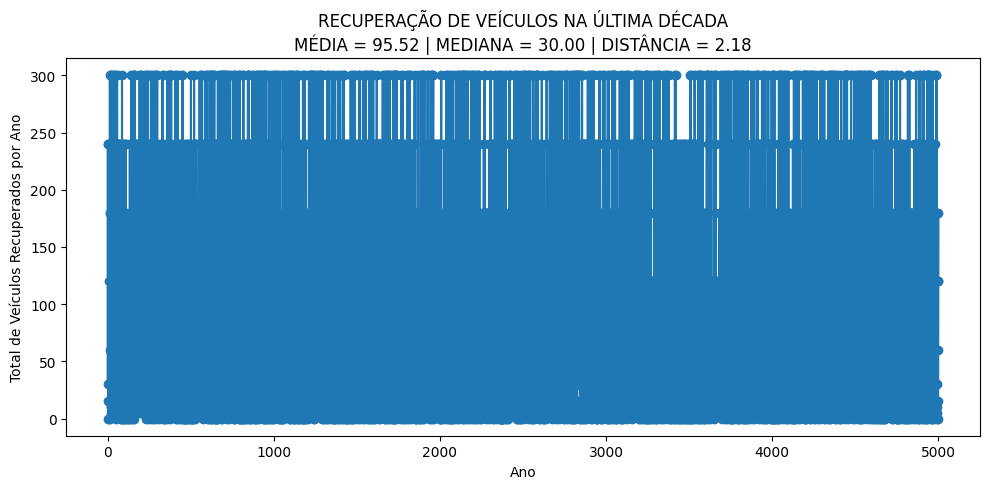

In [19]:
#GRÁFICO DO TOTAL DE RECUPERÇÃO DE VEÍCULOS POR ANO
plt.figure(figsize=(10,5))
plt.plot(df_consultas['id_consulta'], df_consultas['espera_calc'], marker='o', linestyle='-')
plt.title(f'RECUPERAÇÃO DE VEÍCULOS NA ÚLTIMA DÉCADA\nMÉDIA = {media_tp_esp:.2f} | MEDIANA = {mediana_tp_esp:.2f} | DISTÂNCIA = {distancia_tp_esp:.2f}')
plt.xlabel('Ano')
plt.ylabel('Total de Veículos Recuperados por Ano')
plt.tight_layout()
plt.show()

AVALIAÇÕES

In [ ]:
df_avaliacoes.head(5)

In [ ]:
#ARRAY + MÉDIA, MEDIANA E DISTÂNIA - AVALIAÇÕES
array_aval = np.array(df_avaliacoes['nota_satisfacao'])
media_aval = np.mean(array_aval)
mediana_aval = np.median(array_aval)
distancia_aval = (media_aval - mediana_aval)/mediana_aval
print(f"MÉDIA = {media_aval:.2f}\nMEDIANA = {mediana_aval:.2f}\nDISTÂNCIA = {distancia_aval:.2f}")

In [ ]:
#q1, q2, q3, iqr, limite superior e inferior AVALIAÇÕES
q1_aval = np.percentile(array_aval,25)
q2_aval = np.percentile(array_aval,50)
q3_aval = np.percentile(array_aval,75)
iqr_aval = q3_aval - q1_aval
lim_sup_aval = q3_aval + (1.5*iqr_aval)
lim_inf_aval = q1_aval - (1.5*iqr_aval)
print(f"Q1={q1_aval:.2f}\nQ2={q2_aval:.2f}\nQ3={q3_aval:.2f}")
print(f"IQR (Q3 - Q1): {iqr_aval:.2f}\
      \nLimite Superior: {lim_sup_aval:.2f}\nLimite Inferior: {lim_inf_aval:.2f}\nMediana: {mediana_aval:.2f} \nMédia: {media_aval:.2f}")

PACIENTES

In [ ]:
df_pacientes.head()

MÉDICOS

In [ ]:
#quantidade de médicos por especialidade
df_med_espec = df_medicos.groupby('especialidade')['nome'].count().reset_index()
df_med_espec = df_med_espec.sort_values('nome')
df_med_espec


In [ ]:
#ARRAY + MÉDIA, MEDIANA E DISTÂNIA TEMPO DE ATENDIMENTO
array_espec = np.array(df_med_espec['nome'])
media_espec= np.mean(array_espec)
mediana_espec = np.median(array_espec)
distancia_espec = (media_espec - mediana_espec)/mediana_espec
print(f"MÉDIA = {media_espec:.2f}\nMEDIANA = {mediana_espec:.2f}\nDISTÂNCIA = {distancia_espec:.2f}")

In [ ]:
#q1, q2, q3, iqr, limite superior e inferior TEMPO DE ATENDIMENTO
q1_espec = np.percentile(array_espec,25)
q2_espec = np.percentile(array_espec,50)
q3_espec = np.percentile(array_espec,75)
iqr_espec = q3_espec - q1_espec
lim_sup_espec = q3_espec + (1.5*iqr_espec)
lim_inf_espec = q1_espec - (1.5*iqr_espec)
print(f"Q1={q1_espec:.2f}\nQ2={q2_espec:.2f}\nQ3={q3_espec:.2f}")
print(f"IQR (Q3 - Q1): {iqr_espec:.2f}\
      \nLimite Superior: {lim_sup_espec:.2f}\nLimite Inferior: {lim_inf_espec:.2f}\nMediana: {mediana_espec:.2f} \nMédia: {media_espec:.2f}")

CLÍNICAS

In [ ]:
df_clinicas.head()

In [ ]:
df_clinicas_capacidade = df_clinicas.groupby('nome')['capacidade_diaria'].sum().sort_values(ascending=True)

In [ ]:
#ARRAY + MÉDIA, MEDIANA E DISTÂNIA CAPACIDADE DIARIA
array_clin =np.array(df_clinicas['capacidade_diaria'])
media_clin= np.mean(array_clin)
mediana_clin = np.median(array_clin)
distancia_clin = (media_clin - mediana_clin)/mediana_clin
print(f"MÉDIA = {media_clin:.2f}\nMEDIANA = {mediana_clin:.2f}\nDISTÂNCIA = {distancia_clin:.2f}")

In [ ]:
#q1, q2, q3, iqr, limite superior e inferior CAPACIDADE DIARIA
q1_clin = np.percentile(array_clin,25)
q2_clin = np.percentile(array_clin,50)
q3_clin = np.percentile(array_clin,75)
iqr_clin = q3_clin - q1_clin
lim_sup_clin = q3_clin + (1.5*iqr_clin)
lim_inf_clin = q1_clin - (1.5*iqr_clin)
print(f"Q1={q1_clin:.2f}\nQ2={q2_clin:.2f}\nQ3={q3_clin:.2f}")
print(f"IQR (Q3 - Q1): {iqr_clin:.2f}\
      \nLimite Superior: {lim_sup_clin:.2f}\nLimite Inferior: {lim_inf_clin:.2f}\nMediana: {mediana_clin:.2f} \nMédia: {media_clin:.2f}")

In [ ]:
#GRÁFICO DISPERSÃO DE ROUBO DE VEÍCULOS POR ANO
plt.figure(figsize=(10,5))
plt.scatter(df_consultas['espera_calc'],df_avaliacoes['nota_satisfacao'])
plt.title('TEMPO DE ESPERA x NOTA DE SATISFAÇÃO')
plt.xlabel('TEMPO DE ESPERA)')
plt.ylabel('NOTA DE SATISFAÇÃO')
plt.show()
